In [1]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(directory=r'E:\VIT\dataset\training_set'
                                          ,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2418 images belonging to 3 classes.


In [5]:
x_test=test_datagen.flow_from_directory(directory=r'E:\VIT\dataset\test_set'
                                        ,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 600 images belonging to 3 classes.


In [6]:
print(x_train.class_indices)

{'french_fries': 0, 'pizza': 1, 'samosa': 2}


In [7]:
from collections import Counter as c
c(x_train.labels)

Counter({0: 804, 1: 804, 2: 810})

In [8]:
model=Sequential()

In [9]:

from tensorflow.keras.applications.vgg16 import VGG16

In [16]:
base_model =  VGG16(input_shape = (224, 224, 3), 
include_top = False, 
weights = 'imagenet')

In [17]:
for layer in base_model.layers:
    layer.trainable = False

In [18]:
x = Flatten()(base_model.output)

In [19]:
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(3, activation='softmax')(x)

model = Model(base_model.input, x)

model.compile(optimizer = "adam", loss = 'categorical_crossentropy',metrics = ["accuracy"])


In [20]:
a=round(2418/32)
b=round(600/32)
print(a,b)

76 19


In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [22]:
history=model.fit(x_train,steps_per_epoch = a , epochs = 100 , validation_data = x_test,validation_steps = b)


Epoch 1/100
76/76 [==============================] - 362s 5s/step - loss: 2.0310 - accuracy: 0.6977 - val_loss: 0.3295 - val_accuracy: 0.8750
Epoch 2/100
76/76 [==============================] - 359s 5s/step - loss: 0.4178 - accuracy: 0.8437 - val_loss: 0.3803 - val_accuracy: 0.8467
Epoch 3/100
76/76 [==============================] - 361s 5s/step - loss: 0.3674 - accuracy: 0.8639 - val_loss: 0.3926 - val_accuracy: 0.8517
Epoch 4/100
76/76 [==============================] - 361s 5s/step - loss: 0.3474 - accuracy: 0.8772 - val_loss: 0.2762 - val_accuracy: 0.8950
Epoch 5/100
76/76 [==============================] - 360s 5s/step - loss: 0.2987 - accuracy: 0.8821 - val_loss: 0.4118 - val_accuracy: 0.8567
Epoch 6/100
76/76 [==============================] - 362s 5s/step - loss: 0.3064 - accuracy: 0.8834 - val_loss: 0.2595 - val_accuracy: 0.9117
Epoch 7/100
76/76 [==============================] - 365s 5s/step - loss: 0.2872 - accuracy: 0.8900 - val_loss: 0.2768 - val_accuracy: 0.9117
Epoch 

In [23]:
np.save('history_best_2.npy',history.history)

In [24]:
model.save("recipe_best_2.h5")

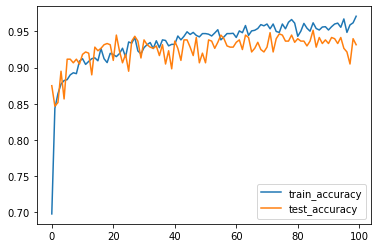

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="train_accuracy")
plt.plot(history.history['val_accuracy'],label="test_accuracy")
plt.legend()

In [27]:
train_loss,train_acc=model.evaluate(x_train)

76/76 [==============================] - 272s 4s/step - loss: 0.0359 - accuracy: 0.9859


In [28]:
test_loss,test_acc=model.evaluate(x_test)

19/19 [==============================] - 62s 3s/step - loss: 0.3437 - accuracy: 0.9317
